# Summary Statistics, Hypthesis Tests, Models and Visualizations 
# Kim Bui & Camille Eastvold

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

## Import Dataframes for Analysis 

In [4]:
merged = pd.read_csv("merged.csv")
display(merged)

,Attrition,job_dissatisfied_2018,job_satisfied_2018,female_2018,male_2018,married_2018,single_2018,overtime_2018,individual income_2018,job_dissatisfied_2022,job_satisfied_2022,female_2022,male_2022,married_2022,single_2022,overtime_2022,individual income_2022
0,Yes/Count,462.0,4266.0,4307.00,421.00,3548.00,1180.00,1531.00,70285.0,94.00,105.00,86.00,113.00,61.00,114.00,139.00,48290.95
1,Yes/%,0.1,0.9,0.91,0.09,0.75,0.25,0.32,41404.0,0.47,0.53,0.43,0.57,0.31,0.57,0.70,32892.00
2,No/Count,3867.0,35342.0,35847.00,3362.00,29490.00,9719.00,12056.00,85444.0,545.00,932.00,592.00,885.00,716.00,408.00,337.00,82227.62
3,No/%,0.1,0.9,0.91,0.09,0.75,0.25,0.31,37157.0,0.37,0.63,0.40,0.60,0.48,0.28,0.23,62448.00


In [5]:
#import both df from csv files 
data_2018 = pd.read_csv("clean_webscraped.csv")
display(data_2018)
data_2022 = pd.read_csv("clean_kaggle.csv")
display(data_2022)

,age,job_dissatisfied,job_satisfied,female,male,married,single,overtime,individual income
0,55.0,462.0000,4266.0000,4307.0000,421.0000,3548.0000,1180.0000,1531.0000,70285.0
1,11.0,0.0977,0.9023,0.9110,0.0890,0.7504,0.2496,0.3238,41404.0
2,48.0,3867.0000,35342.0000,35847.0000,3362.0000,29490.0000,9719.0000,12056.0000,85444.0
3,12.0,0.0986,0.9014,0.9143,0.0857,0.7521,0.2479,0.3075,37157.0


,Attrition,Age,Gender,MaritalStatus,OverTime,Job_Satisfaction,Income
0,No,41.0,Female,Single,Yes,Yes,71916.0
1,No,49.0,Male,Married,No,No,61560.0
2,Yes,37.0,Male,Single,Yes,Yes,25080.0
3,No,33.0,Female,Married,Yes,Yes,34908.0
4,No,27.0,Male,Married,No,No,41616.0
...,...,...,...,...,...,...,...
1671,Yes,26.0,Male,Single,Yes,Yes,28080.0
1672,No,46.0,Female,Married,Yes,Yes,108852.0
1673,No,20.0,Female,Single,No,No,34032.0
1674,No,39.0,Female,Married,No,Yes,152904.0


## Findings 

### Visualizations using Merged Dataframe 

**Job Disatisfaction Rates were Higher after COVID**

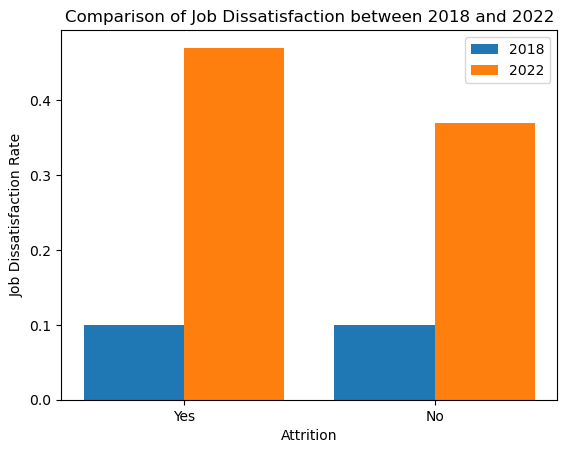

In [9]:
# Select the values for rows 1 and 3
values_2018 = merged.loc[[1, 3], 'job_dissatisfied_2018']
values_2022 = merged.loc[[1, 3], 'job_dissatisfied_2022']

# Define the positions and labels
positions = ['Yes', 'No']
width = 0.4

# Create the bar plot
fig, ax = plt.subplots()
bar1 = ax.bar([p - width/2 for p in range(len(positions))], values_2018, width=width, label='2018')
bar2 = ax.bar([p + width/2 for p in range(len(positions))], values_2022, width=width, label='2022')

# Labeling the bars
ax.set_xlabel('Attrition')
ax.set_ylabel('Job Dissatisfaction Rate')
ax.set_title('Comparison of Job Dissatisfaction between 2018 and 2022')
ax.set_xticks(range(len(positions)))
ax.set_xticklabels(positions)
ax.legend()

# Save as png
plt.savefig('Comparison of Job Dissatisfaction between 2018 and 2022.png')

# Display the plot
plt.show()


**After Covid, Overtime Rates went up along with Attrition**

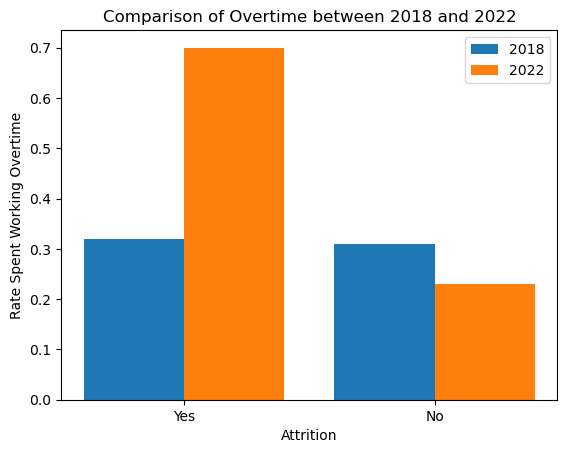

In [11]:
# Select the values for rows 1 and 3
values_2018 = merged.loc[[1, 3], 'overtime_2018']
values_2022 = merged.loc[[1, 3], 'overtime_2022']

# Define the positions and labels
positions = ['Yes', 'No']
width = 0.4

# Create the bar plot
fig, ax = plt.subplots()
bar1 = ax.bar([p - width/2 for p in range(len(positions))], values_2018, width=width, label='2018')
bar2 = ax.bar([p + width/2 for p in range(len(positions))], values_2022, width=width, label='2022')

# Labeling the bars
ax.set_xlabel('Attrition')
ax.set_ylabel('Rate Spent Working Overtime')
ax.set_title('Comparison of Overtime between 2018 and 2022')
ax.set_xticks(range(len(positions)))
ax.set_xticklabels(positions)
ax.legend()

# Save as png
plt.savefig('Comparison of Overtime between 2018 and 2022.png')

# Display the plot
plt.show()


### Digging deeper in 2022: After COVID Attrition Data 

**Nurses who were paid less, quit**

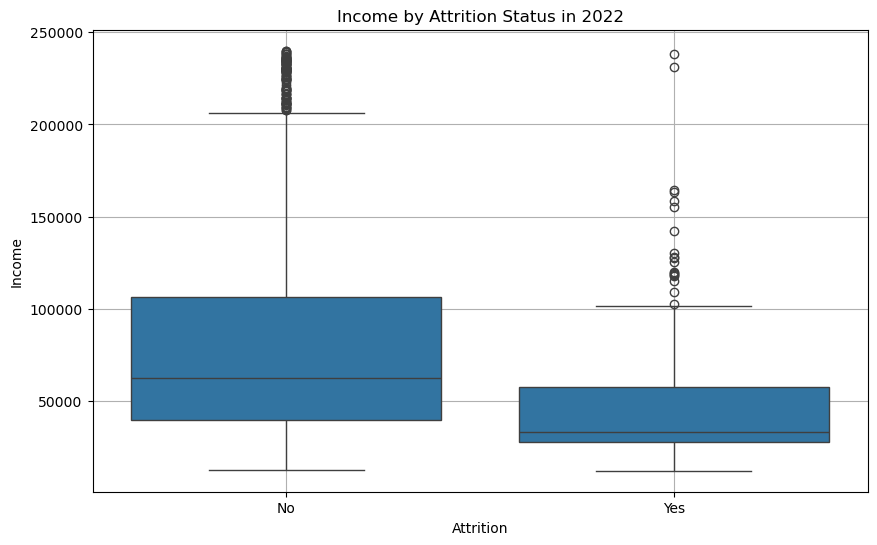

Income for those who quit in 2022:

Median Income: $32892.0

Average Income: $48290.95

Income for those who stayed in 2022:

Median Income: $62448.0

Average Income: $82227.62



In [14]:
# Income box plot for 2022
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Income', data=data_2022)

# Labeling the chart
plt.xlabel('Attrition')
plt.ylabel('Income')
plt.title('Income by Attrition Status in 2022')
plt.grid(True)

# Save as png
plt.savefig('Income by Attrition Status in 2022.png')

# Display the chart
plt.show()

# Display summary stats about each. In merged df, the yes or no/count is average income values and for % column it is the median values of income
mean_yes = merged.loc[0, 'individual income_2022']
median_yes = merged.loc[1, 'individual income_2022']
mean_no =merged.loc[2, 'individual income_2022']
median_no = merged.loc[3, 'individual income_2022']


print(f"Income for those who quit in 2022:\n")
print(f"Median Income: ${median_yes}\n")
print(f"Average Income: ${mean_yes}\n")


print(f"Income for those who stayed in 2022:\n")
print(f"Median Income: ${median_no}\n")
print(f"Average Income: ${mean_no}\n")

**This test shows there is a statistcally significant weak correlation between Attrition and Income in year 2022. Since our p value of 1.3217736355038282e-15 was less than .05, that means it is signifcant enough to reject null hypthosis that there is no relationship. However the correlation value of -0.19352671640277294, indicated a weak negative correlation. In conclusion, this means income may have an impact on whether a nurse quits or not but it is not the dominating factor. Perhaps it is a combination of factors.**

In [16]:
#import pearson
from scipy.stats import pearsonr

# Check for corrleations between income and attrition
# Convert the 'Attrition' column to numeric values using one hot encoding
data_2022['Attrition_Binary'] = data_2022['Attrition'].map({'No': 0, 'Yes': 1})

# Calculate pearson correlation
corr, p_value = pearsonr(data_2022['Attrition_Binary'], data_2022['Income'])

# Display the correlation and p-value
print(f'Pearson Correlation Coefficient: {corr}')
print(f'P-value: {p_value}')

#Interpret results
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")

print(f"This test shows there is a statistcally significant weak correlation between Attrition and Income in year 2022. Since our p value of {p_value} was less than .05, that means it is signifcant enough to reject null hypthosis that there is no relationship. However the correlation value of {corr}, indicated a weak negative correlation. In conclusion, this means income may have an impact on whether a nurse quits or not but it is not the dominating factor. Perhaps it is a combination of factors.")


Pearson Correlation Coefficient: -0.19352671640277294
P-value: 1.3217736355038282e-15
The correlation is statistically significant.
This test shows there is a statistcally significant weak correlation between Attrition and Income in year 2022. Since our p value of 1.3217736355038282e-15 was less than .05, that means it is signifcant enough to reject null hypthosis that there is no relationship. However the correlation value of -0.19352671640277294, indicated a weak negative correlation. In conclusion, this means income may have an impact on whether a nurse quits or not but it is not the dominating factor. Perhaps it is a combination of factors.


### Linear Regression Model 
**Findings: Higher income slightly reduces likelihood of attrition. Younger nurses are slightly more likely to leave. Other factors are not significant. This could be due to the overfitting model. The R squared value is 1 which means it is overfitting because there is no unexplained variability.**

In [18]:
import pandas as pd
import statsmodels.api as sm

# Convert the 'Attrition' column to binary format (0 for 'No' and 1 for 'Yes')
data_2022['Attrition_Binary'] = data_2022['Attrition'].map({'No': 0, 'Yes': 1})

# Convert categorical columns to numeric using one hot encoding
data_encoded = pd.get_dummies(data_2022.drop('Attrition', axis=1), drop_first=True)

# Define the dependent variable (Attrition_Binary)
Y = data_2022['Attrition_Binary']

# Define the independent variables (all other columns)
X = data_encoded

# Add a constant term for the intercept
X = sm.add_constant(X)

# Ensure all data is numeric and cast to float type
X = X.astype(float)
Y = Y.astype(float)

# Build the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Attrition_Binary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.262e+26
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:52:31   Log-Likelihood:                 47073.
No. Observations:                1676   AIC:                        -9.413e+04
Df Residuals:                    1667   BIC:                        -9.408e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.823e-